In [20]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [21]:
# Charger le DataFrame avec l'encodage spécifié
df = pd.read_csv("datasets/SBAnational-cleaned.csv", low_memory=False)
df = df.dropna()

In [22]:




# Supprimer les espaces dans les noms de colonnes
df.columns = df.columns.str.strip()

# Réinitialiser l'index
df = df.reset_index(drop=True)

df['NAICS'] = df['NAICS'].replace({'.': 'Unknown', '5': 'Unknown', '0': 'Unknown' })

# Définir X et y
X = df.drop("MIS_Status", axis=1)
y = df["MIS_Status"]

# Définir les colonnes numériques et catégorielles
colonnes_numeriques = X.select_dtypes(include=['int64', 'float64']).columns
colonnes_categorielles = X.select_dtypes(include=['object']).columns.drop(['Name', 'City', 'Bank', 'ApprovalDate'], errors='ignore')

# Exclure explicitement la colonne cible 'MIS_Status' des colonnes catégorielles
colonnes_categorielles = colonnes_categorielles.drop('MIS_Status', errors='ignore')

# Création du preprocessor pour transformer les données
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", colonnes_numeriques),
        ("cat", OneHotEncoder(handle_unknown='ignore'), colonnes_categorielles)
    ])

# Création du pipeline avec le preprocessor et le modèle RandomForestClassifier
pipeline_rf = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10))
])

# Division du jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Ajustement du modèle sur les données d'entraînement
pipeline_rf.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_rf = pipeline_rf.predict(X_test)

# Calcul de l'accuracy pour le modèle RandomForest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy (RandomForest):", accuracy_rf)


Accuracy (RandomForest): 0.8751998018865801


Matrice de confusion :
[[  9993  21279]
 [   895 145509]]


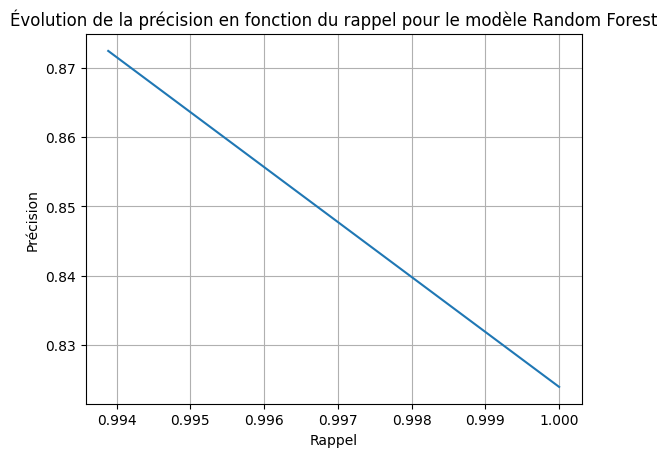

[0 1]



In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict

# Convert categorical labels to binary (0 or 1)
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

# Convertir les prédictions en valeurs numériques
label_encoder_pred = LabelEncoder()
y_pred_rf_numeric = label_encoder_pred.fit_transform(y_pred_rf)

# Matrice de confusion
conf_matrix = confusion_matrix(y_test_binary, y_pred_rf_numeric)
print("Matrice de confusion :")
print(conf_matrix)

# Courbe précision-rappel
precisions_rf, recalls_rf, thresholds_rf = precision_recall_curve(y_test_binary, y_pred_rf_numeric)

plt.plot(recalls_rf[:-1], precisions_rf[:-1])
plt.title("Évolution de la précision en fonction du rappel pour le modèle Random Forest")
plt.xlabel("Rappel")
plt.ylabel("Précision")
plt.grid()
plt.show()





In [24]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

      CHGOFF       0.92      0.32      0.47     31272
       P I F       0.87      0.99      0.93    146404

    accuracy                           0.88    177676
   macro avg       0.90      0.66      0.70    177676
weighted avg       0.88      0.88      0.85    177676

